<a href="https://colab.research.google.com/github/gsingla730/INSE_6220_40224574/blob/main/INSE_6220_40224574.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [41]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.preprocessing import label_binarize
from sklearn import svm
from numpy import linalg as LA
from sklearn.multiclass import OneVsRestClassifier

**Upload files into Colaboratory**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Date_Fruit_Dataset.csv to Date_Fruit_Dataset.csv


**Read the Dataset File**

In [45]:
df =pd.read_csv('Date_Fruit_Dataset.csv')
df.columns
df.head(11)

,AREA,PERIMETER,SOLIDITY,CONVEX_AREA,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,422163,2378.9080,0.9947,424428,1.2976,0.9374,0.8750,BARHEE
1,338136,2085.1440,0.9974,339014,1.2161,0.9773,0.9065,BARHEE
2,526843,2647.3940,0.9962,528876,1.3150,0.9446,0.8706,BARHEE
3,416063,2351.2100,0.9948,418255,1.2831,0.9458,0.8791,BARHEE
4,347562,2160.3540,0.9908,350797,1.3108,0.9358,0.8707,BARHEE
5,408953,2326.6931,0.9974,410036,1.3508,0.9493,0.8589,BARHEE
6,451414,2457.2080,0.9970,452755,1.3631,0.9395,0.8525,BARHEE
7,382636,2275.7791,0.9931,385277,1.3263,0.9284,0.8638,BARHEE
8,546063,2714.9480,0.9882,552598,1.1956,0.9310,0.9099,BARHEE
9,420044,2391.1230,0.9918,423531,1.2972,0.9232,0.8738,BARHEE


In [46]:
df.head()

,AREA,PERIMETER,SOLIDITY,CONVEX_AREA,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,422163,2378.908,0.9947,424428,1.2976,0.9374,0.8750,BARHEE
1,338136,2085.144,0.9974,339014,1.2161,0.9773,0.9065,BARHEE
2,526843,2647.394,0.9962,528876,1.3150,0.9446,0.8706,BARHEE
3,416063,2351.210,0.9948,418255,1.2831,0.9458,0.8791,BARHEE
4,347562,2160.354,0.9908,350797,1.3108,0.9358,0.8707,BARHEE


**Checking for null values**

In [47]:
df.dtypes
df.isnull().sum()
# no null values and hence no replacing
#df.fillna(df.mean(),inplace=True)
#df = df.dropna()

AREA            0
PERIMETER       0
SOLIDITY        0
CONVEX_AREA     0
ASPECT_RATIO    0
ROUNDNESS       0
COMPACTNESS     0
Class           0
dtype: int64

**Classes**

In [48]:
Y= df['Class']
print(Y)

0      BARHEE
1      BARHEE
2      BARHEE
3      BARHEE
4      BARHEE
        ...  
245     DOKOL
246     DOKOL
247     DOKOL
248     DOKOL
249     DOKOL
Name: Class, Length: 250, dtype: object


In [49]:
Y= df['Class']
df.drop(['Class',],axis=1,inplace=True)

** Representing the Count of Date Types**

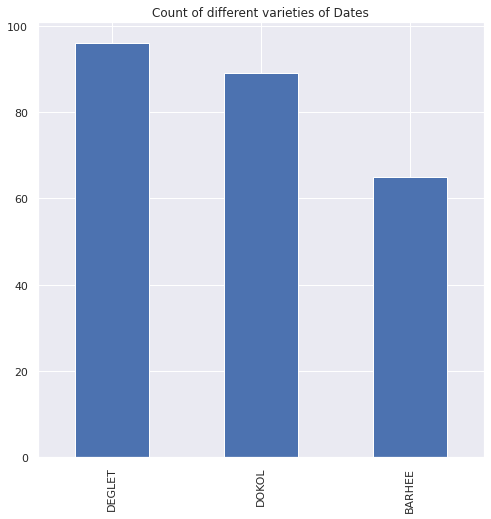

In [50]:
plt. figure(figsize=(8,8))
plt.title("Count of different varieties of Dates")
Y.value_counts().plot(kind = 'bar')

**Normalizing the data**

In [51]:
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          250 non-null    float64
 1   PERIMETER     250 non-null    float64
 2   SOLIDITY      250 non-null    float64
 3   CONVEX_AREA   250 non-null    float64
 4   ASPECT_RATIO  250 non-null    float64
 5   ROUNDNESS     250 non-null    float64
 6   COMPACTNESS   250 non-null    float64
dtypes: float64(7)
memory usage: 13.8 KB


**Observations and variables**

In [52]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

*Visualisation of the data using a box plot*

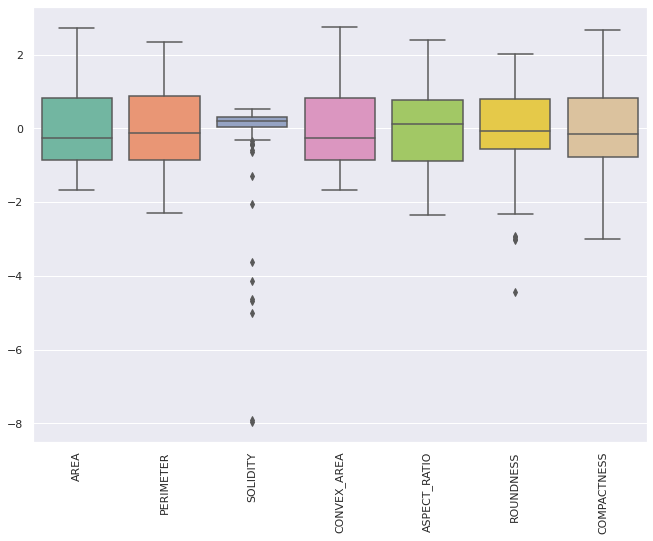

In [53]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1)
ax=sns.boxplot(data=df, orient="v", palette="Set2")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Stripplot to show the datapoints on top of the boxes*

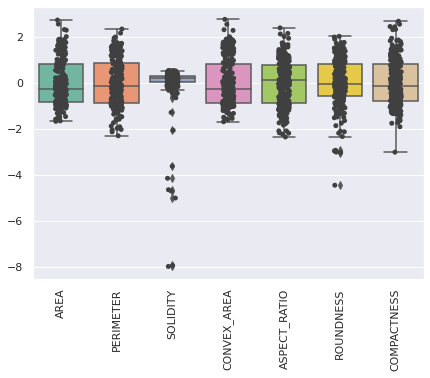

In [54]:
sns.set(rc={'figure.figsize':(7,5)}, font_scale=1)
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Pairplot*

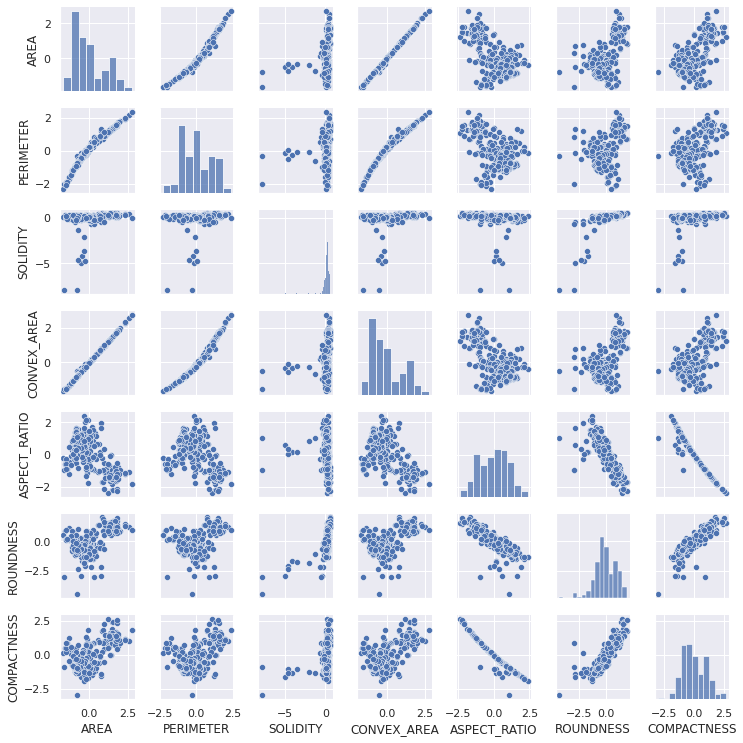

In [55]:
g=sns.pairplot(df,height=1.5)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

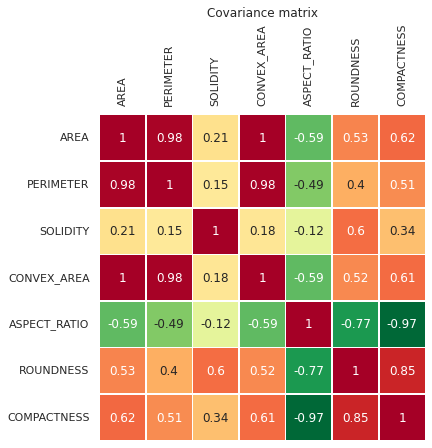

In [56]:
dfc = df - df.mean() #centered data
plt. figure(figsize=(6,6))
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

In [57]:
#calculating Eigen vectors & eigen values
w, v = LA.eig(dfc.cov())

In [58]:
#eigen values
w

array([4.59852302e+00, 1.38818698e+00, 8.94266646e-01, 1.08156293e-01,
       4.99712660e-05, 7.12620718e-03, 3.69088678e-03])

In [59]:
#eigen vectors
v

array([[-4.23686233e-01, -3.31303405e-01,  1.50219621e-01,
         7.25644149e-02, -6.96733287e-01,  4.33774609e-01,
        -9.64303750e-02],
       [-3.91052656e-01, -4.27490696e-01,  2.05418797e-01,
        -9.98904441e-02, -2.36547237e-02, -7.67428168e-01,
         1.50495859e-01],
       [-1.76272736e-01,  5.08352512e-01,  7.35814290e-01,
        -3.60505038e-01,  2.08265269e-02,  1.13803172e-02,
        -1.96356406e-01],
       [-4.20263003e-01, -3.50622427e-01,  1.30949088e-01,
         7.70307264e-02,  7.16636874e-01,  3.96278763e-01,
        -8.21964600e-02],
       [ 3.87651642e-01, -1.99238295e-01,  5.24388137e-01,
         2.37482829e-01,  6.22143589e-05,  1.55121536e-01,
         6.74230375e-01],
       [-3.76149906e-01,  4.50020946e-01,  1.37978565e-02,
         7.92246507e-01,  9.67344778e-05, -1.40441128e-01,
         9.17810890e-02],
       [-4.10014853e-01,  2.89683702e-01, -3.18580524e-01,
        -4.05963137e-01, -1.00688676e-03,  1.48124356e-01,
         6.7803371

**Principal component analysis**

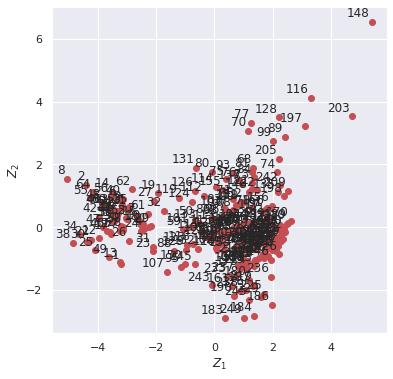

In [60]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
plt. figure(figsize=(6,6))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations, Z[:,0], Z[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

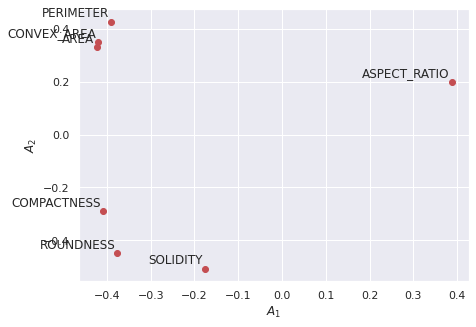

In [61]:
A = pca.components_.T
#print(A.round(4))
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:,0],A[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

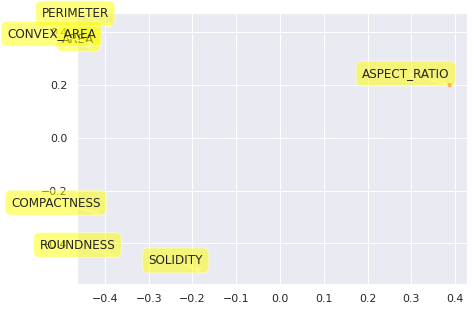

In [62]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

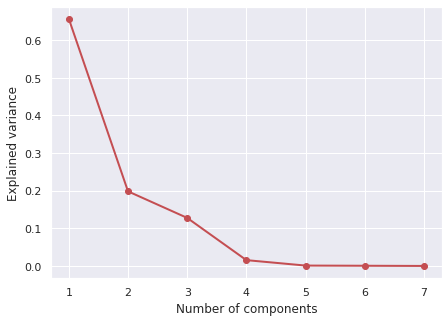

In [63]:
#Eigenvalues
Lambda = pca.explained_variance_
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained variance**

[65.7 19.8 12.8  1.5  0.1  0.1  0. ]


Text(0, 0.5, 'Cumulative explained variance')

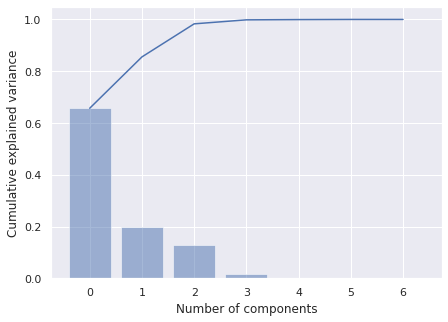

In [20]:
#Explained variance
ell = pca.explained_variance_ratio_
print(ell.round(3)*100)
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

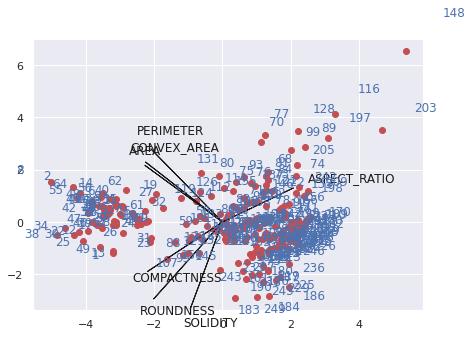

In [64]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal Components**

Text(0.5, 1.0, 'Principal components')

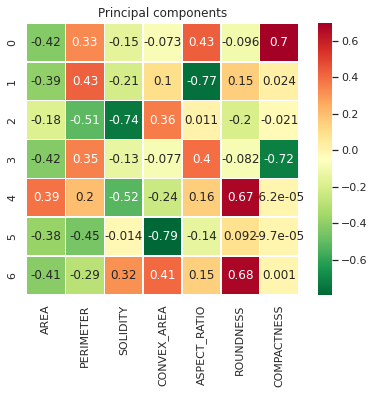

In [65]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, 
            square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

**Hotelling's T2 test**

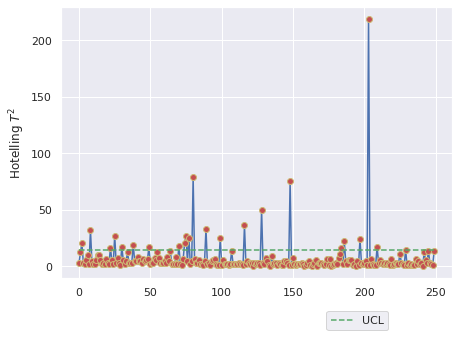

In [66]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda)) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Out of control points**

In [67]:
print (np.argwhere(Tsquare>UCL))

[[  2]
 [  8]
 [ 22]
 [ 25]
 [ 30]
 [ 38]
 [ 49]
 [ 70]
 [ 74]
 [ 75]
 [ 77]
 [ 80]
 [ 89]
 [ 99]
 [116]
 [128]
 [148]
 [184]
 [186]
 [197]
 [203]
 [209]
 [229]]


**Control Charts for Principal Components**

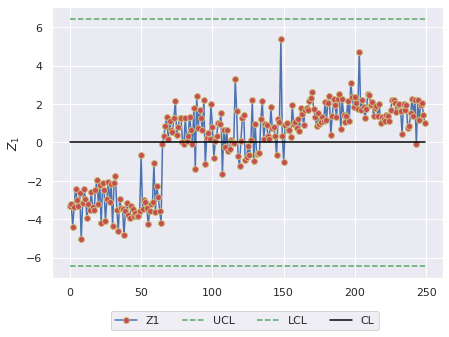

In [68]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

In [69]:
#Accuracy of the dataset with two classification algorithms

KNN_model = KNeighborsClassifier(n_neighbors=5)
scoring=['accuracy']
scores_knn_full_data =cross_validate(KNN_model, df,Y,cv=5, scoring=scoring)
scores_knn_Z = cross_validate(KNN_model,Z, Y,cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(KNN_model, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]
  scores_dict["knn_full_data " + i ]=scores_knn_full_data[i]
  scores_dict["knn_Z " + i ]=scores_knn_Z[i]
  scores_dict["knn_Z12 " + i ]=scores_knn_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)

   gnb_full_data fit_time  gnb_Z fit_time  gnb_Z12 fit_time  \
0                0.002701        0.001188          0.001183   
1                0.002330        0.001315          0.001150   
2                0.002367        0.001148          0.001132   
3                0.002303        0.001136          0.001166   
4                0.002315        0.001140          0.001141   

   knn_full_data fit_time  knn_Z fit_time  knn_Z12 fit_time  \
0                0.003936        0.000986          0.000952   
1                0.002241        0.000977          0.001436   
2                0.002140        0.000948          0.001200   
3                0.002089        0.000932          0.001334   
4                0.002132        0.000975          0.001334   

   gnb_full_data test_accuracy  gnb_Z test_accuracy  gnb_Z12 test_accuracy  \
0                         0.94                 0.80                   0.98   
1                         0.92                 0.92                   0.88   
2       

**Confusion Matrix**

In [70]:
#Confusion matrix for Naive Bayes classification algorithm
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction=gnb.predict(X_test)
cm=confusion_matrix(gnb_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['BARHEE','DEGLET','DOKOL'],
                  columns=['BARHEE','DEGLET','DOKOL'])

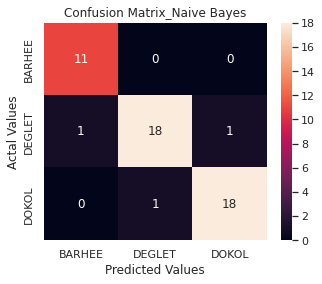

In [71]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_Naive Bayes')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [72]:
#Confusion matrix for k-NN classification algorithm
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
cm=confusion_matrix(KNN_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['BARHEE','DEGLET','DOKOL'],
                  columns=['BARHEE','DEGLET','DOKOL'])

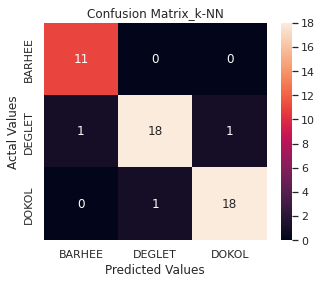

In [73]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_k-NN')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Bar Chart**

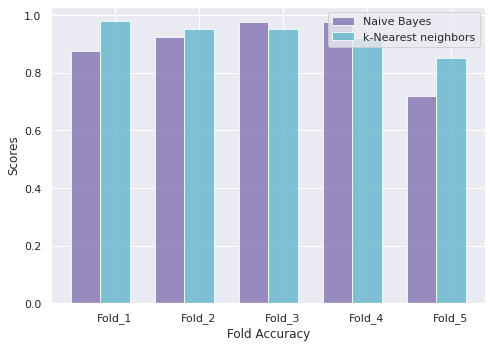

In [74]:
n_groups =5
KNN = (0.98, 0.95, 0.95, 0.92,0.85)
NB = (0.875, 0.925, 0.975, 0.975,0.72)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width,
alpha=opacity,
color='m',
label='Naive Bayes')

rects2 = plt.bar(index + bar_width,KNN, bar_width,
alpha=opacity,
color='c',
label='k-Nearest neighbors')

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()